In [1]:
# The goal of this program is to graphically model and optimize the magnetic field under the experimental conditions
# selected for this project

#Import the different modules that will be useful for the modeling
import pandas as pd
import numpy as np
import sympy as sp
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt 
    #allows you to create graphs
from scipy.optimize import curve_fit 
    #importing specific command for curvefitting
%matplotlib notebook   
    #allows you to interact with the plot

In [2]:
# create an empty list to store the values of the x-axis and y-axis in.  In this case, the x-axis will be the distance
# (r) between the helmholtz coils and the y-axis will be the magnetic field

x_axis = []
y_axis =[]


In [3]:
# Let's clean up the code a bit and redefine our variables to make this model more user friendly (and applicable to 
# more situations)

# N = the number of coils in the helmholtz coil system 

# I = the current being sent through the coils (A)

# a is the coil radius (m)

# b is half the distance between the coils (m)

# r is the distance between the helmholtz coils that we will be calculating the B field for (m)

In [4]:
# The first thing we need to do is calculate the B-field.  To do this I will use the Helmholtz coil equation to determine
# the B-field at a point

# Define the function we are going to integrate:
    # Numerator = ((2*(a))*((a)-((r)*np.cos(x)))
    # Denominator = ((((a)**2)+((b)**2)+((r)**2)-(2*(a)*(r)*(np.cos(x))))**(3/2))

# N = the number of coils in the helmholtz coil system 
N = 119.633

# I = the current being sent through the coils (A)
I = 2.4

# a is the coil radius (m)
a = 0.15

# b is half the distance between the coils (m)
b = 0.05


def f1(x):
    return ((N*I)*0.0001)*(((2*(a))*((a)-((r)*np.cos(x))))/
                      ((((a)**2)+((-b)**2)+((r)**2)-(2*(a)*(r)*(np.cos(x))))**(3/2)))

# put the integration into a loop to iterate over the values of r which correspond to the distances between 
# the center of the coils

# set r = -0.15 (the distance between the helmholtz coils)
r = -0.15

while r < 0.15:
    # add r to list of x-axis points
    x_axis.append(r)
    
    # Set the bounds for the integral of a and b
    c = 0
    d = 2*(np.pi)

    # Perform the integration calculation
    result = integrate.quad(f1,c,d)
    
    # Add result to list of y-axis
    y_axis.append(result[0])
    
    # increment r
    r = r + 0.02
    print(result)

(0.8151325571839124, 7.921822086133708e-09)
(1.6819432198914064, 7.368921317849616e-11)
(2.1107694835631086, 1.1496162471159763e-11)
(2.203550410939943, 1.2689798830325045e-08)
(2.1715956845267534, 5.023970426318019e-11)
(2.1154752229144114, 1.643217860821312e-08)
(2.0700398772515403, 4.740351221599211e-11)
(2.045929120015115, 2.2714376157918656e-14)
(2.045929120015115, 3.3172536256424813e-09)
(2.0700398772515403, 4.7403536972632786e-11)
(2.115475222914411, 1.6432178791624735e-08)
(2.171595684526753, 5.023968035800459e-11)
(2.203550410939944, 1.2689798830324192e-08)
(2.110769483563107, 1.1496178115589708e-11)
(1.6819432198914073, 7.36891826514287e-11)


In [5]:
# create an empty data frame to put the x and y axis values into 
print(len('x_axis'))
print(len('y_axis'))

g = pd.DataFrame({('xaxis'):x_axis,
                  ('yaxis'):y_axis})
g

6
6


,xaxis,yaxis
0,-0.15,0.815133
1,-0.13,1.681943
2,-0.11,2.110769
3,-0.09,2.203550
4,-0.07,2.171596
5,-0.05,2.115475
6,-0.03,2.070040
7,-0.01,2.045929
8,0.01,2.045929
9,0.03,2.070040


<IPython.core.display.Javascript object>


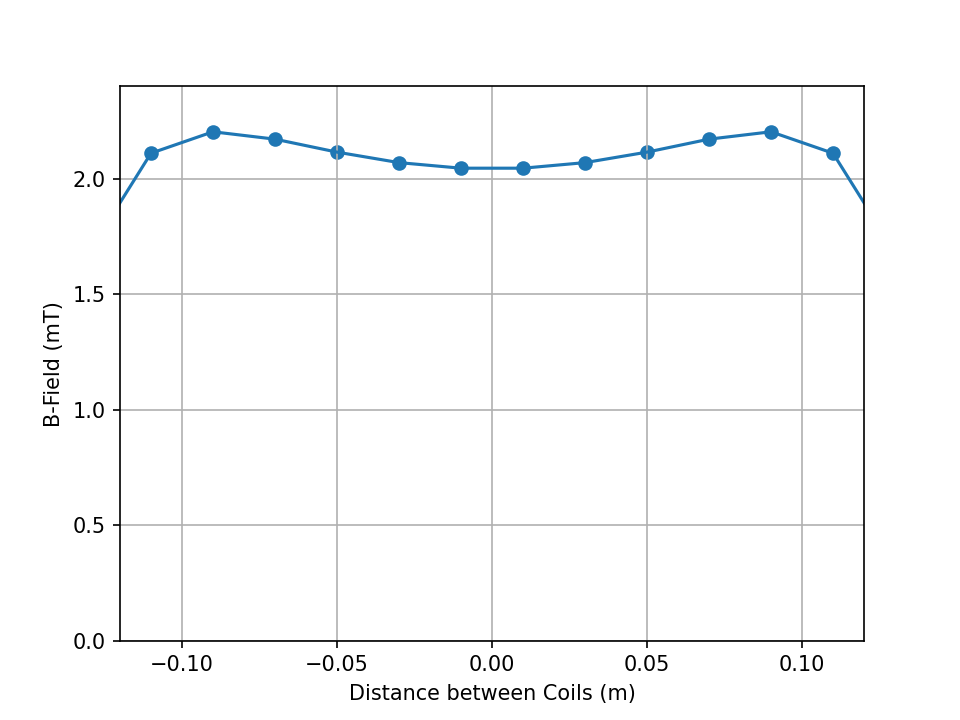

Text(0, 0.5, 'B-Field (mT)')

In [6]:
plt.figure()
plt.grid(True)
    #will give you a scatterplot
plt.scatter(g.xaxis, g.yaxis)
plt.plot(g.xaxis, g.yaxis)
plt.show()
plt.axis([-0.12, 0.12, 0, 2.4])
plt.xlabel("Distance between Coils (m)")
plt.ylabel("B-Field (mT)")

<IPython.core.display.Javascript object>


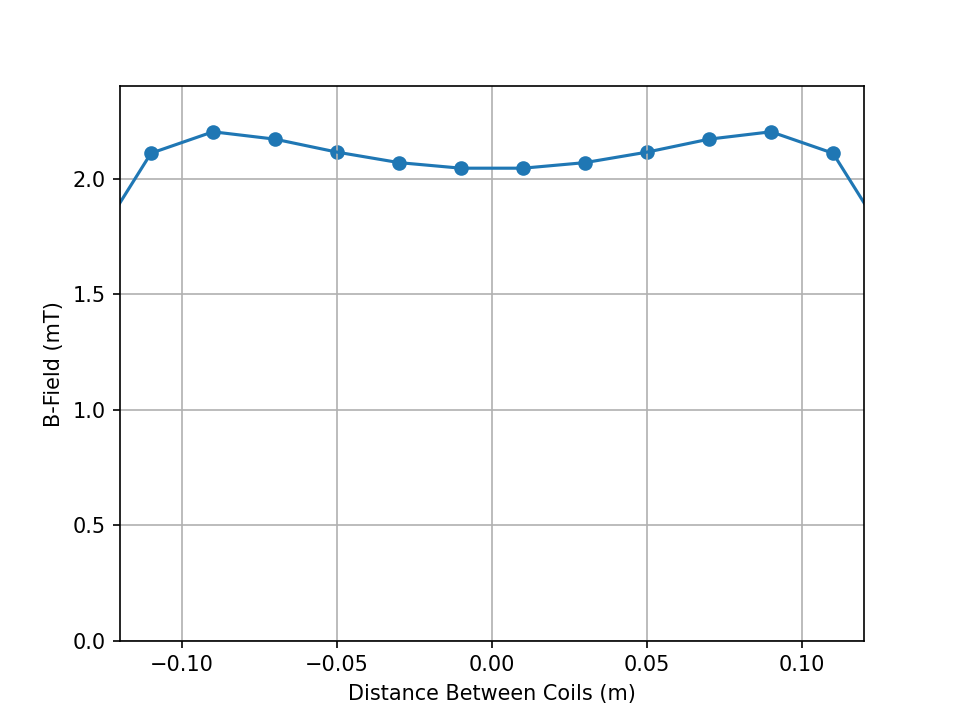

Text(0, 0.5, 'B-Field (mT)')

In [7]:
plt.figure()
plt.grid(True)
    #will give you a scatterplot
plt.scatter(g.xaxis, g.yaxis)
plt.plot(g.xaxis, g.yaxis)
plt.show()
plt.axis([-0.12, 0.12, 0, 2.4])
plt.xlabel("Distance Between Coils (m)")
plt.ylabel("B-Field (mT)")